In [4]:
import pandas as pd

djia_data  = pd.read_csv("HistoricalPrices.csv")

print(djia_data .head())

       Date      Open      High       Low     Close
0  01/13/25  41924.68  42319.60  41844.89  42297.12
1  01/10/25  42540.29  42540.29  41877.30  41938.45
2  01/08/25  42542.10  42656.22  42327.79  42635.20
3  01/07/25  42809.71  42931.54  42380.75  42528.36
4  01/06/25  42835.52  43115.31  42611.16  42706.56


In [5]:
print(djia_data .tail())

         Date      Open      High       Low     Close
254  01/08/24  37327.37  37692.92  37249.24  37683.01
255  01/05/24  37455.46  37623.62  37323.82  37466.11
256  01/04/24  37425.28  37716.41  37425.28  37440.34
257  01/03/24  37629.23  37629.23  37401.85  37430.19
258  01/02/24  37566.22  37790.08  37495.91  37715.04


In [6]:
djia_data = djia_data.rename(columns = {' Open': 'Open', ' High': 'High', ' Low': 'Low', ' Close': 'Close'})

In [7]:
djia_data['Date'] = pd.to_datetime(djia_data['Date'])
djia_data = djia_data.sort_values(by = 'Date')

C:\Users\comp\AppData\Local\Temp\ipykernel_9644\220103799.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  djia_data['Date'] = pd.to_datetime(djia_data['Date'])


In [9]:
%pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------- ----------------------------- 2.1/8.0 MB 11.5 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.0 MB 11.7 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.0 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 10.8 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 10.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ----------------------------------- ---- 2.4/2.6 MB 11.9 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 10.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

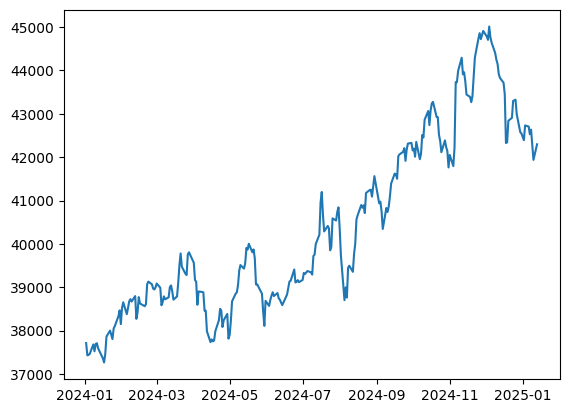

In [11]:
plt.plot(djia_data['Date'], djia_data['Close'])
plt.show()

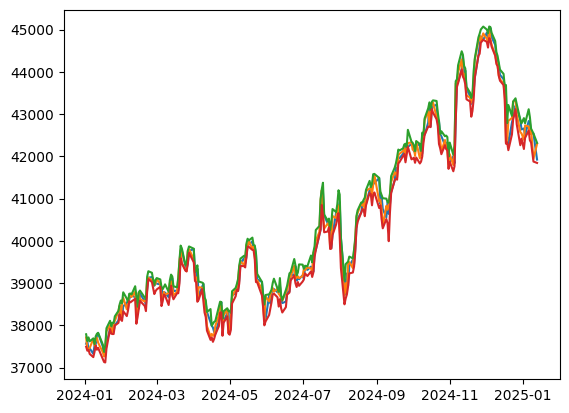

In [17]:
plt.plot(djia_data['Date'], djia_data['Open'])
plt.plot(djia_data['Date'], djia_data['Close'])
plt.plot(djia_data['Date'], djia_data['High'])
plt.plot(djia_data['Date'], djia_data['Low'])
plt.show()

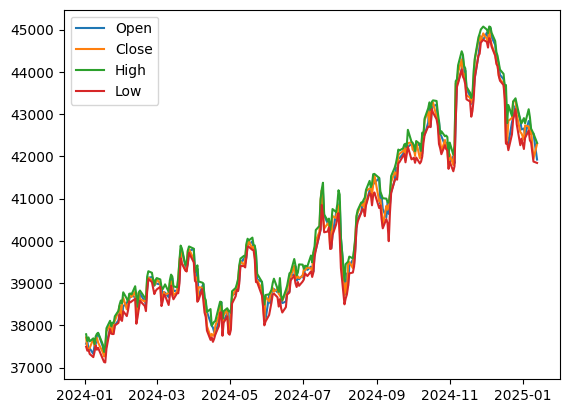

In [21]:
plt.plot(djia_data['Date'], djia_data['Open'] ,label="Open" )
plt.plot(djia_data['Date'], djia_data['Close'] ,label="Close")
plt.plot(djia_data['Date'], djia_data['High'], label="High")
plt.plot(djia_data['Date'], djia_data['Low'], label="Low")

plt.legend()
plt.show()

In [28]:
# Import the calendar package 
from calendar import month_name

# Order by months by chronological order
djia_data['Month'] = pd.Categorical(djia_data['Date'].dt.month_name(), month_name[:])

# Group metrics by monthly averages
djia_monthly_mean = djia_data \
    .groupby('Month') \
    .mean() \
    .reset_index()

djia_monthly_mean.head(6)

#print(djia_monthly_mean)

C:\Users\comp\AppData\Local\Temp\ipykernel_9644\2170333364.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Month') \


,Month,Date,Open,High,Low,Close
0,,NaT,NaN,NaN,NaN,NaN
1,January,2024-04-14 12:51:25.714285824,38930.959643,39101.836429,38750.571429,38938.326429
2,February,2024-02-15 04:48:00.000000000,38685.346500,38823.823500,38534.799500,38720.518000
3,March,2024-03-15 02:24:00.000000000,39090.646000,39239.157000,38950.232000,39105.520000
4,April,2024-04-14 22:54:32.727272704,38504.349545,38628.500455,38246.146364,38401.217273
5,May,2024-05-15 20:43:38.181818112,39127.017273,39291.536818,38974.169091,39129.390455


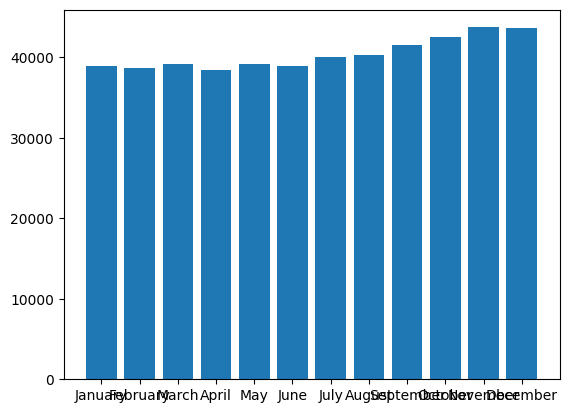

In [29]:
plt.bar(djia_monthly_mean['Month'], height = djia_monthly_mean['Close'])
plt.show()

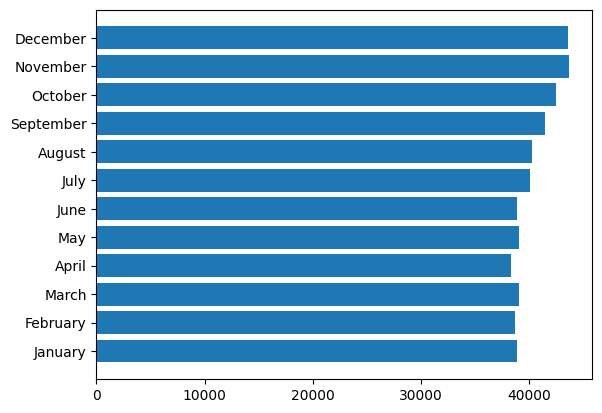

In [34]:
plt.barh(djia_monthly_mean['Month'], width = djia_monthly_mean['Close'])
plt.show()

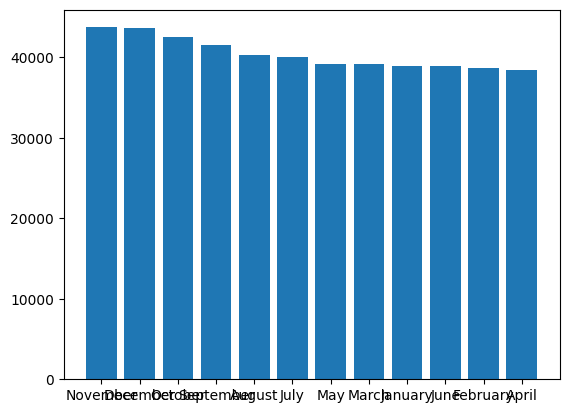

In [32]:
djia_monthly_mean_srtd = djia_monthly_mean.sort_values(by = 'Close', ascending = False)

plt.bar(djia_monthly_mean_srtd['Month'], height = djia_monthly_mean_srtd['Close'])
plt.show()

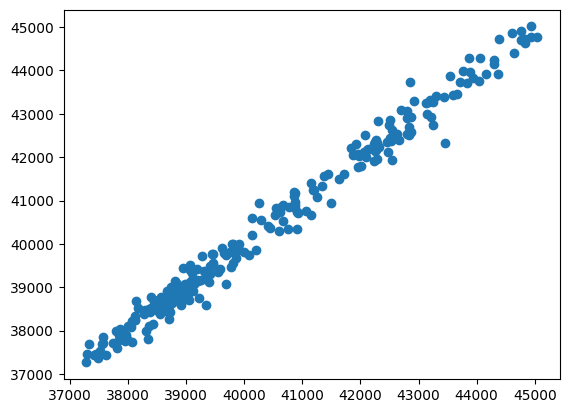

In [35]:
plt.scatter(djia_data['Open'], djia_data['Close'])
plt.show()